# Rental property analysis in Germany

# Task 4– Supervised Machine Learning: Regression

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Performance improvement after removing outliers

### 1. Importing libraries and data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
path = r'C:\Users\marce\Documents\Apartment rental offers in Germany'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_cleaned_upd.csv'))

### 2. Data cleaning 

In [6]:
df.columns

Index(['Unnamed: 0', 'State', 'Maintenance_fee', 'Heating_type', 'TV_offer',
       'Newly_built', 'Balcony', 'Picture_count', 'Price_trend', 'Total_rent',
       'Year_constructed', 'Kitchen', 'Cellar', 'Base_rent', 'Area(m2)',
       'City', 'House_condition', 'Lift', 'Flat_type', 'Pincode',
       'Rooms_number', 'Floor', 'Garden'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Total_rent,...,Base_rent,Area(m2),City,House_condition,Lift,Flat_type,Pincode,Rooms_number,Floor,Garden
0,0,Nordrhein_Westfalen,245,central_heating,ONE_YEAR_FREE,False,False,6,4,840,...,595,86,Dortmund,well_kept,False,ground_floor,44269,4,1,True
1,1,Rheinland_Pfalz,134,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3,919,...,800,89,Rhein_Pfalz_Kreis,refurbished,False,ground_floor,67459,3,2,False
2,2,Sachsen,255,floor_heating,ONE_YEAR_FREE,True,True,8,2,1300,...,965,83,Dresden,first_time_use,True,apartment,1097,3,3,False
3,3,Sachsen,58,district_heating,ONE_YEAR_FREE,False,True,9,1,919,...,343,58,Mittelsachsen_Kreis,well_kept,False,other,9599,3,3,False
4,4,Bremen,138,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2,903,...,765,84,Bremen,refurbished,False,apartment,28213,3,1,False
5,5,Schleswig_Holstein,142,gas_heating,NONE,False,True,5,4,919,...,315,53,Schleswig_Flensburg_Kreis,well_kept,False,apartment,24891,2,2,False
6,6,Bremen,88,central_heating,ONE_YEAR_FREE,False,True,5,1,584,...,452,60,Bremen,well_kept,False,ground_floor,28717,3,2,False
7,7,Baden_Württemberg,110,oil_heating,ONE_YEAR_FREE,False,False,5,3,690,...,580,53,Emmendingen_Kreis,well_kept,False,roof_storey,79211,2,2,False
8,8,Nordrhein_Westfalen,95,self_contained_central_heating,ONE_YEAR_FREE,False,False,7,1,919,...,300,60,Gelsenkirchen,well_kept,False,apartment,45888,2,2,False
9,9,Sachsen,88,central_heating,ONE_YEAR_FREE,False,True,11,0,307,...,219,40,Chemnitz,well_kept,False,apartment,9130,2,3,False


In [8]:
df.shape

(204611, 23)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

Unnamed: 0          0
State               0
Maintenance_fee     0
Heating_type        0
TV_offer            0
Newly_built         0
Balcony             0
Picture_count       0
Price_trend         0
Total_rent          0
Year_constructed    0
Kitchen             0
Cellar              0
Base_rent           0
Area(m2)            0
City                0
House_condition     0
Lift                0
Flat_type           0
Pincode             0
Rooms_number        0
Floor               0
Garden              0
dtype: int64

In [10]:
#Dropping 'Unnamed' column
df.drop('Unnamed: 0', axis=1, inplace= True)

##### Duplicates check 

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(204611,)

##### Extreme values checks

In [13]:
#Keep data only for 'Total_rent'<5000' for individual use
df=df[df['Total_rent']<5000]

In [14]:
#Keep data only for 'Area'>9 m2' -minimum legal living space for a person in Germany
df=df[df['Area(m2)']>9]

In [15]:
#Create a new Column for Price per m2
df['TotalRent_per_m2']= df['Total_rent']/df['Area(m2)']

In [16]:
df.head()

,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Total_rent,Year_constructed,...,Area(m2),City,House_condition,Lift,Flat_type,Pincode,Rooms_number,Floor,Garden,TotalRent_per_m2
0,Nordrhein_Westfalen,245,central_heating,ONE_YEAR_FREE,False,False,6,4,840,1965,...,86,Dortmund,well_kept,False,ground_floor,44269,4,1,True,9.767442
1,Rheinland_Pfalz,134,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3,919,1871,...,89,Rhein_Pfalz_Kreis,refurbished,False,ground_floor,67459,3,2,False,10.325843
2,Sachsen,255,floor_heating,ONE_YEAR_FREE,True,True,8,2,1300,2019,...,83,Dresden,first_time_use,True,apartment,1097,3,3,False,15.662651
3,Sachsen,58,district_heating,ONE_YEAR_FREE,False,True,9,1,919,1964,...,58,Mittelsachsen_Kreis,well_kept,False,other,9599,3,3,False,15.844828
4,Bremen,138,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2,903,1950,...,84,Bremen,refurbished,False,apartment,28213,3,1,False,10.750000


In [17]:
df.head(20)

,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Total_rent,Year_constructed,...,Area(m2),City,House_condition,Lift,Flat_type,Pincode,Rooms_number,Floor,Garden,TotalRent_per_m2
0,Nordrhein_Westfalen,245,central_heating,ONE_YEAR_FREE,False,False,6,4,840,1965,...,86,Dortmund,well_kept,False,ground_floor,44269,4,1,True,9.767442
1,Rheinland_Pfalz,134,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3,919,1871,...,89,Rhein_Pfalz_Kreis,refurbished,False,ground_floor,67459,3,2,False,10.325843
2,Sachsen,255,floor_heating,ONE_YEAR_FREE,True,True,8,2,1300,2019,...,83,Dresden,first_time_use,True,apartment,1097,3,3,False,15.662651
3,Sachsen,58,district_heating,ONE_YEAR_FREE,False,True,9,1,919,1964,...,58,Mittelsachsen_Kreis,well_kept,False,other,9599,3,3,False,15.844828
4,Bremen,138,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2,903,1950,...,84,Bremen,refurbished,False,apartment,28213,3,1,False,10.750000
5,Schleswig_Holstein,142,gas_heating,NONE,False,True,5,4,919,1999,...,53,Schleswig_Flensburg_Kreis,well_kept,False,apartment,24891,2,2,False,17.339623
6,Bremen,88,central_heating,ONE_YEAR_FREE,False,True,5,1,584,1959,...,60,Bremen,well_kept,False,ground_floor,28717,3,2,False,9.733333
7,Baden_Württemberg,110,oil_heating,ONE_YEAR_FREE,False,False,5,3,690,1970,...,53,Emmendingen_Kreis,well_kept,False,roof_storey,79211,2,2,False,13.018868
8,Nordrhein_Westfalen,95,self_contained_central_heating,ONE_YEAR_FREE,False,False,7,1,919,1953,...,60,Gelsenkirchen,well_kept,False,apartment,45888,2,2,False,15.316667
9,Sachsen,88,central_heating,ONE_YEAR_FREE,False,True,11,0,307,1930,...,40,Chemnitz,well_kept,False,apartment,9130,2,3,False,7.675000


In [18]:
df.shape

(204593, 23)

C:\Users\marce\AppData\Local\Temp\ipykernel_27864\615632291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalRent_per_m2'], bins=25) # Shows extreme values


<Axes: xlabel='TotalRent_per_m2', ylabel='Density'>

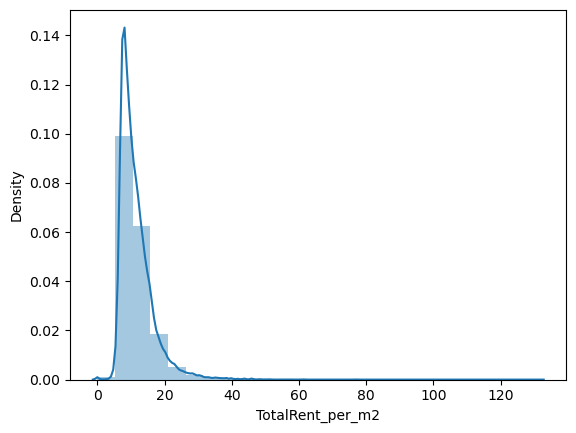

In [19]:
sns.distplot(df['TotalRent_per_m2'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [20]:
df['TotalRent_per_m2'].value_counts()

10.000000    1580
15.316667     958
7.500000      874
8.000000      867
7.000000      762
             ... 
14.942308       1
19.107527       1
15.424528       1
12.879518       1
16.617978       1
Name: TotalRent_per_m2, Length: 35666, dtype: int64

C:\Users\marce\AppData\Local\Temp\ipykernel_27864\615632291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalRent_per_m2'], bins=25) # Shows extreme values


<Axes: xlabel='TotalRent_per_m2', ylabel='Density'>

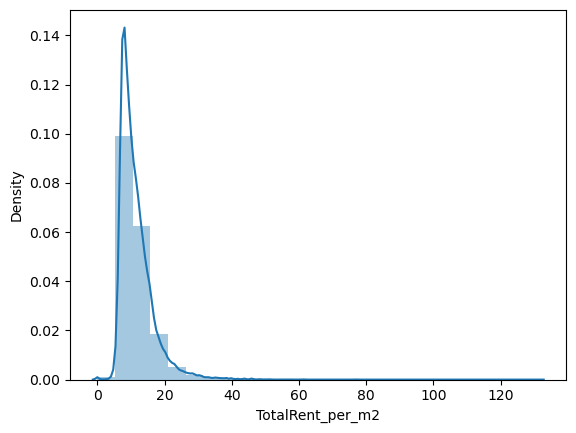

In [21]:
sns.distplot(df['TotalRent_per_m2'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [22]:
df['TotalRent_per_m2'].mean() # Check the mean

11.54705998148609

In [23]:
df['TotalRent_per_m2'].median() # Check the median

10.22

In [24]:
df['TotalRent_per_m2'].max() # Check the max

131.5

In [25]:
df['TotalRent_per_m2'].describe()


count    204593.000000
mean         11.547060
std           5.112449
min           0.000000
25%           8.111111
50%          10.220000
75%          13.500000
max         131.500000
Name: TotalRent_per_m2, dtype: float64

### 3. Data prep for regression analysis   

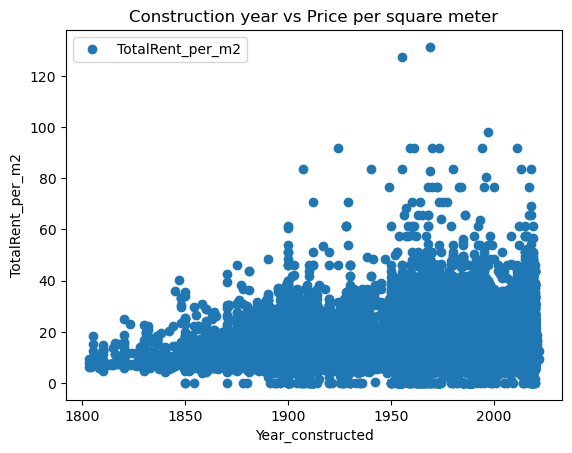

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_constructed', y='TotalRent_per_m2',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Construction year vs Price per square meter')  
plt.xlabel('Year_constructed')  
plt.ylabel('TotalRent_per_m2')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year_constructed'].values.reshape(-1,1)
y = df['TotalRent_per_m2'].values.reshape(-1,1)

In [28]:
X

array([[1965],
       [1871],
       [2019],
       ...,
       [1965],
       [2019],
       [1972]], dtype=int64)

In [29]:
y

array([[ 9.76744186],
       [10.3258427 ],
       [15.6626506 ],
       ...,
       [ 9.78947368],
       [14.5       ],
       [11.93506494]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis


In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.


In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)


LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

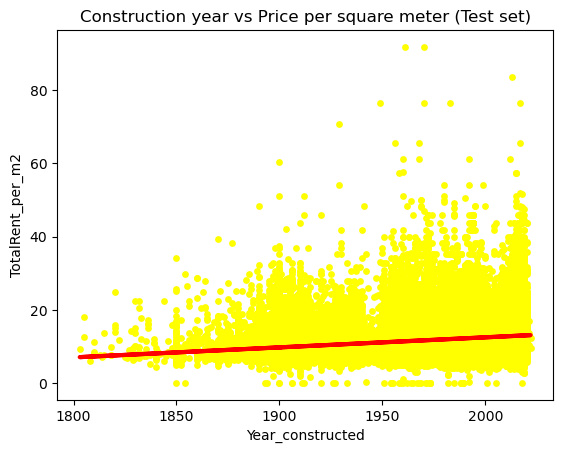

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='yellow', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Construction year vs Price per square meter (Test set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('TotalRent_per_m2')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02748882]]
Mean squared error:  24.59739965230329
R2 score:  0.0424526037691495


#### A positive slope indicates a positive relationship as Year of construction rises the price per m2 also rises. R2 is not that great as the value is closer to zero.

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.450980,9.682194
1,9.142857,12.266143
2,11.807692,11.111613
3,6.057143,12.321121
4,25.000000,8.885018
5,11.733333,11.743856
6,7.261905,12.101210
7,8.333333,11.661389
8,14.356322,12.650987
9,11.355932,11.606411


### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!


In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02748882]]
Mean squared error:  25.216257649872333
R2 score:  0.04227852266976695


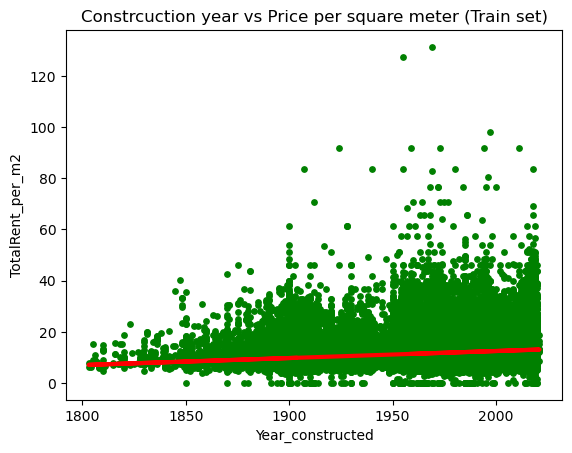

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Constrcuction year vs Price per square meter (Train set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('TotalRent_per_m2')
plot_test.show()

### 5. Perfomance improvement after removing outliers 

In [42]:
# Clean the extreme values from the "TotalRent per m2" variable observed during the consistency checks.

df_test = df[df['TotalRent_per_m2'] <=50] 

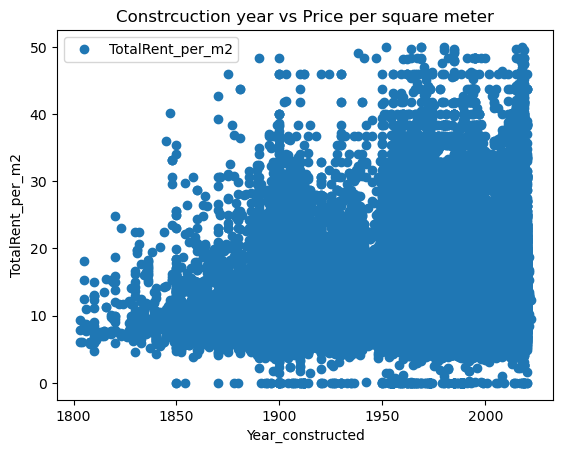

In [43]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year_constructed', y='TotalRent_per_m2', style='o')  
plt.title('Constrcuction year vs Price per square meter')  
plt.xlabel('Year_constructed')  
plt.ylabel('TotalRent_per_m2')  
plt.show()

In [44]:
# Reshape again.

X_2 = df_test['Year_constructed'].values.reshape(-1,1)
y_2 = df_test['TotalRent_per_m2'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02718976]]
Mean squared error:  23.368141102099173
R2 score:  0.045409308414864014


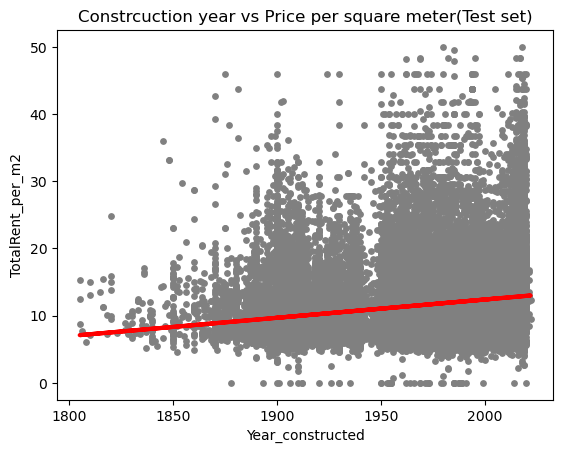

In [50]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Constrcuction year vs Price per square meter(Test set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('TotalRent_per_m2')
plot_test.show()

In [51]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,8.333333,9.672948
1,30.633333,10.814918
2,6.544444,11.820939
3,9.700000,11.793749
4,7.711864,12.310355
5,9.266667,11.630611
6,18.380000,10.488641
7,16.122807,10.135174
8,14.822581,12.935719
9,10.389474,9.944846


### Hypothesis: Newer the rental property is, Higher the rental price. 

#### Comparing actual values with predicted values we can see a big difference between them. According to the R2 score, which is 0,04 after performance improvement , it indicates very poor fit of 4%. Therefore our model isn't performing too well.

In [52]:
#Export the new data:

df.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_cleaned_2505.csv'))

In [53]:
#Export the new data:

df_test.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_cleaned_m2_50'))